# **1. Perkenalan Dataset**


**Bank Transaction Dataset for Fraud Detection**:</br>
This dataset provides a detailed look into transactional behavior and financial activity patterns, ideal for exploring fraud detection and anomaly identification. It contains 2,512 samples of transaction data, covering various transaction attributes, customer demographics, and usage patterns. Each entry offers comprehensive insights into transaction behavior, enabling analysis for financial security and fraud detection applications.

1. **Sumber Dataset**:  
   Dataset diperoleh dari [Kaggle](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection?resource=download)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Dataset memiliki 2.512 baris data
   - **Tipe Data**: Mengandung 14 kolom dengan data **kategorikal** dan **numerikal** serta 2 kolom dengan data **waktu**.
     - *Kategorikal*: TransactionID, AccountID, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, dan CustomerOccupation.
     - *Numerikal*: TransactionAmount, AccountBalance, CustomerAge, TransactionDuration, dan LoginAttemps.
     - *Waktu*: TransactionDate dan PreviousTransactionDate.

3. **Key Feature**:  
   - TransactionID ➔ Unique alphanumeric identifier for each transaction.
   - AccountID ➔ Unique identifier for each account, with multiple transactions per account.
   - TransactionAmount ➔ Monetary value of each transaction, ranging from small everyday expenses to larger purchases. 
   - TransactionDate ➔ Timestamp of each transaction, capturing date and time.
   - TransactionType ➔ Categorical field indicating 'Credit' or 'Debit' transactions.
   - Location ➔ Geographic location of the transaction, represented by U.S. city names.
   - DeviceID ➔ Alphanumeric identifier for devices used to perform the transaction.
   - IP Address ➔ IPv4 address associated with the transaction, with occasional changes for some accounts.
   - MerchantID ➔ Unique identifier for merchants, showing preferred and outlier merchants for each account.
   - AccountBalance ➔ Balance in the account post-transaction, with logical correlations based on transaction type and amount.
   - PreviousTransactionDate ➔ Timestamp of the last transaction for the account, aiding in calculating transaction frequency.
   - Channel ➔ Channel through which the transaction was performed (e.g., Online, ATM, Branch).
   - CustomerAge ➔ Age of the account holder, with logical groupings based on occupation.
   - CustomerOccupation ➔ Occupation of the account holder (e.g., Doctor, Engineer, Student, Retired), reflecting income patterns.
   - TransactionDuration ➔ Duration of the transaction in seconds, varying by transaction type.
   - LoginAttempts ➔ Number of login attempts before the transaction, with higher values indicating potential anomalies.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
url = "https://raw.githubusercontent.com/dewiryori/BMLP/refs/heads/main/dataset/bank_transactions_data_2.csv"
df = pd.read_csv(url)
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. Memahami Struktur Data

In [4]:
# Meninjau jumlah baris, kolom, tipe data, dan jumlah nilai non-null dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

**Insights:**</br>
Berdasarkan hasil pengamatan struktur dataset di atas, terdapat beberapa poin yang dapat disimpulkan yakni sebagai berikut:</br>

- Dataset memiliki 2512 entri dan 16 kolom dengan tipe data terdiri dari:
  *   11 kolom bertipe object
  *   2 kolom bertipe float64
  *   3 kolom bertipe int64
  *   Adapun detail dari setiap kolom adalah sebagai berikut:
      * TransactionID adalah ID unik untuk setiap transaksi dan bertipe data object
      * AccountID adalah ID unik untuk setiap akun dan bertipe data object
      * TransactionAmount adalah jumlah uang setiap transaksi yang dilakukan dan bertipe data float 64
      * TransactionDate adalah catatan tanggal setiap transaksi dilakukan dan bertipe data object
      * TransactionType adalah jenis transaksi seperti "Debit" atau "Kredit" dan bertipe data object
      * Location adalah informasi lokasi geografis transaksi dan bertipe object
      * DeviceID adalah ID perangkat yang digunakan saat transaksi dan bertipe data object
      * IP Address adalah catatan alamat IP perangkat setiap transaksi dilakukan dan bertipe data object
      * MerchantID adalah ID unik penjual atau merchant yang digunakan saat transaksi dan bertipe data object
      * Channel adalah metode transaksi yang digunakan seperti mobile banking atau ATM dan bertipe data object
      * CustomerAge adalah umur pelanggan atau pemilik akun dan bertipe data int64
      * CustomerOccupation adalah jenis pekerjaan pelanggan atau pemilik akun dan bertipe data object
      * TransactionDuration adalah durasi transaksi dalam hitungan detik yang dilakukan oleh setiap pemilik akun dan bertipe data int76
      * LoginAttempts adalah catatan jumlah percobaan login yang dilakukaan saat sebelum transaksi berhasil dan bertipe data int64
      * AccountBalance adalah saldo akun pelanggan setelah transaksi berhasil dilakukan dan bertipe data float64
      * PreviousTransactionDate adalah catatan tanggal transaksi yang terakhir dilakukan oleh akun tersebut dan bertipe data object
- Semua kolom memiliki nilai non-null, artinya tidak ada nilai yang hilang (missing values) yang perlu ditangani. Namun lebih baik dicek lagi pada tahapan ke 2.

2. Menangani Data yang Hilang (Missing Values)

In [5]:
# Mengidentifikasi dan menganalisis data yang hilang (missing values)
print("Jumlah data yang hilang per kolom:")
print(df.isnull().sum())

Jumlah data yang hilang per kolom:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


**Insights:**</br>
- Setelah dilakukan pengecekan ke-2 menggunakan kode print(df.isnull().sum()), semakin mengonfirmasi bahwa tidak ada nilai yang hilang (missing values) dalam tiap kolom pada dataset df (bank_transaction_data_2).
- Kode df.duplicated().sum() digunakan untuk menghitung jumlah baris duplikat data dalam dataset df (bank_transaction_data_2). Output menunjukkan hasil 0, artinya tidak ada duplikat data dalam dataset tersebut.

3. Analisis Distribusi dan Korelasi

In [6]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


**Insights yang diperoleh dari kolom-kolom numerik dalam dataset:**
1. TransactionAmount (Jumlah Transaksi)
    * Rata-rata transaksi sebesar 297,59 cukup menggambarkan pembelian rutin
    * Standar deviasi pada 291,95 menunjukkan variasi pelanggan dalam melakukan transaksi kecil hingga sangat besar. Transaksi besar (maks 1919,11) mungkin menggambarkan pembelian barang mahal atau tagihan penting. Sementara transaksi kecil (min 0,26) mungkin mencggambarkan transfer atau pembayaran nominal kecil.
    * Kuartil 1 (81,89) hingga kuartil 3 (414,53) mencakup mayoritas transaksi pelanggan kemungkinan untuk transaksi pembelanjaan reguler

2. CustomerAge (Umur Pelanggan)
    * Rata-rata umur pelanggan menunjukkan 44,67 tahun yang mana merupakan termasuk pelanggan dewasa. Oleh karena itu, kemungkinan sebagian besar sudah memiliki stabilitas finansial
    * Umur termuda ialah 18 tahun dan tertua ialah 80 tahun, menunjukkan keberagaman demografi. Kuartil bawah (27 tahun) hingga kuartil atas (59 tahun) mencakup kelompok umur produktif yang kemungkinan besar lebih aktif melakukan transaksi
    * Pelanggan usia lanjut mungkin melakukan kegiatan transaksi (belanja) yang lebih terencana, sementara usia muda cenderung impulsif

3. TransactionDuration (Durasi Transaksi)
    * Durasi rata-rata transaksi adalah 119,64 detik (hampir 2 menit), menunjukkan proses yang cukup cepat. Hal ini menunjukkan efisiensi dari pembelian online
    * Durasi minimum 10 detik dapat diindikasikan sebagai transaksi otomatis (pembayaran berulang)
    * Transaksi yang memakan waktu sampai 300 detik mungkin melibatkan proses verifikasi tambahan atau pelanggan belum terbiasa dengan sistem digital

4. LoginAttempts (Percobaan Login)
    * Rata-rata 1,12 kali login menunjukkan mayoritas pelanggan berhasil mengakses akun mereka pada percobaan pertama
    * Percobaan maksimal 5 kali menunjukkan potensi masalah akses seperti kendala teknis atau pelanggan lupa kata sandi
    * Hampir semua transaksi menggunakan percobaan login pertama, ditunjukkan oleh nilai kuartil 1 hingga 3 menunjukkan nilai 1. Hal ini mencerminkan pengalaman pengguna yang baik

5. AccountBalance (Saldo Akun)
    * Rata-rata saldo 5114,30 cukup besar, menunjukkan kecenderungan pelanggan memiliki financial stable
    * Standar deviasi 3900,94 dan saldo maksimum 14977,99 menunjukkan adanya pelanggan yang memiliki daya beli tinggi
    * Mayoritas pelanggan memiliki saldo di rentang 1504,37 hingga 7678,82 (kuartil bawah hingga atas), cukup untuk memenuhi kebutuhan transaksi reguler

<function matplotlib.pyplot.show(close=None, block=None)>

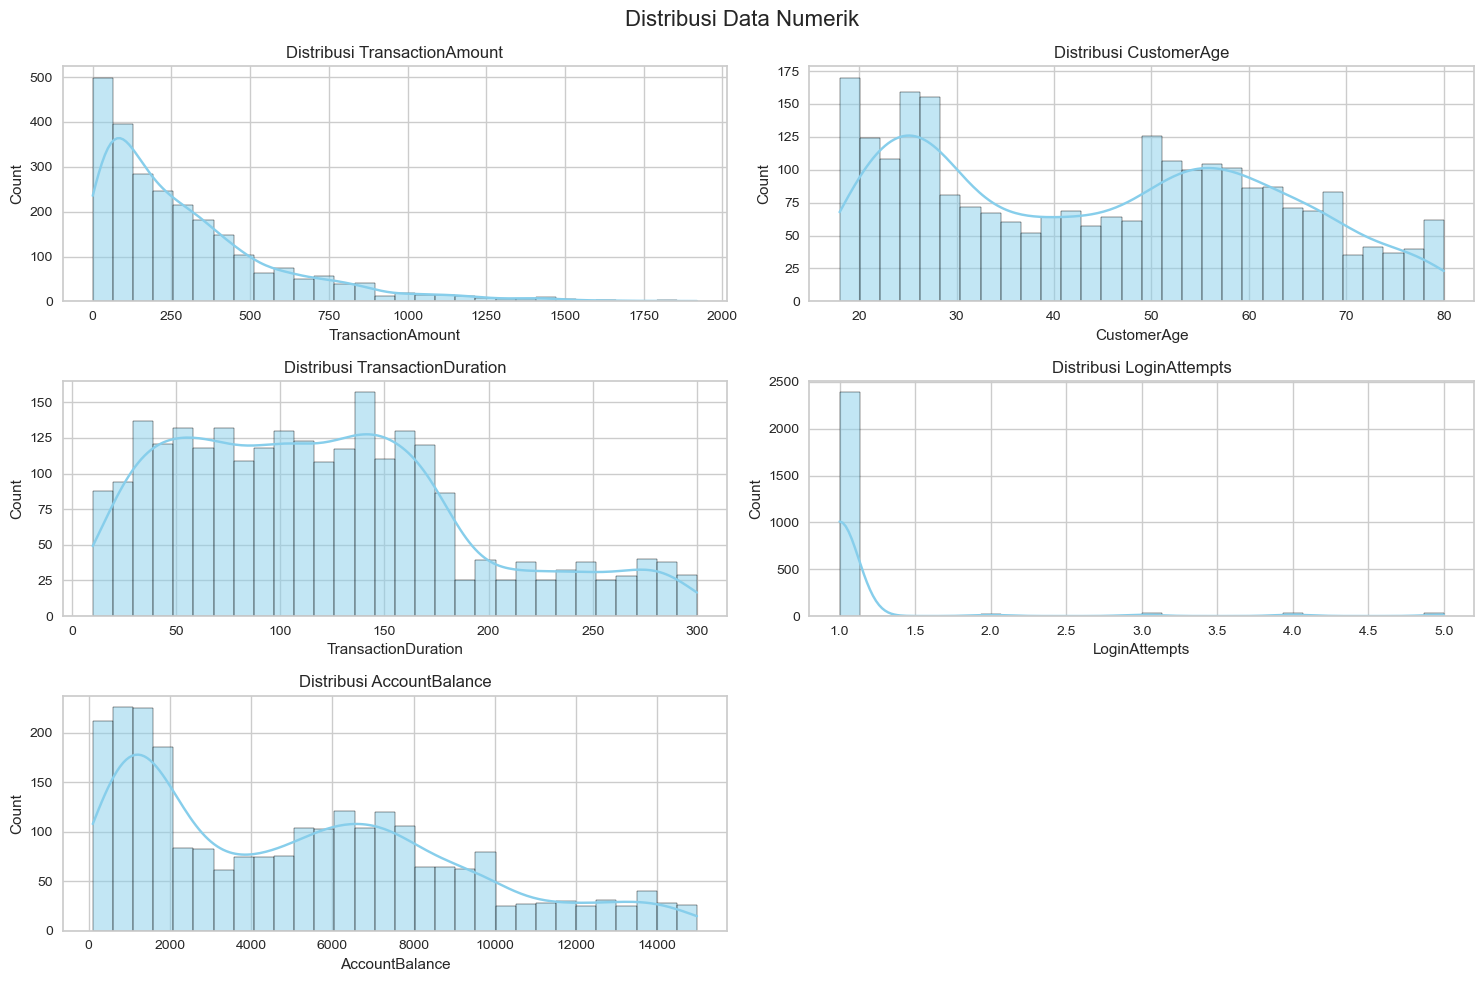

In [7]:
# Mengidentifikasi semua kolom numerik
numeric_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.suptitle('Distribusi Data Numerik', fontsize=16)
plt.tight_layout()
plt.show

**Insights:**</br>
- Histogram Distribusi TransactionAmount menunjukkan positively skewed distribution (kemiringan positif). Artinya sebagian besar nilai transaksi yang dilakukan berada di rentang kecil, sementara nilai transaksi besar menunjukkan penurunan drastis. Hal ini mencerminkan perilaku umum pelanggan untuk melakukan transaksi dengan nominal kecil dibandingkan dengan nominal besar untuk kebutuhan sehari-hari.
- Histogram Distribusi CustomerAge memiliki 2 puncak utama (umur 20-30 tahun dan 50-60 tahun), menunjukkan bimodal skewness. Artinya kelompok usia muda sering melakukan transaksi karena mungkin untuk kebutuhan konsumtif, sedangkan untuk kelompok usia lebih tua cenderung melakukan transaksi untuk keperluan pengelolaan dana.
- Histogram Distribusi TransactionDuration menunjukkan distribusi yang relatif simetris meskipun ada sedikit positively skewed di sekitar 150 detik, yang kemungkinan terjadi akibat adanya proses verifikasi keamanan.
- Histogram Distribusi LoginAttempts menunjukkan sangat positively skewed karena mayoritas pelanggan melakukkan 1 kali percobaan login. Hal ini menunjukkan sistem yang mudah digunakan.
- Histogram Distribusi AccountBalance menunjukkan positively skewed dengan sebagian besar pelanggan memiliki saldo rendah (puncak sekitar 2000). Penurunan saldo saat mendekati angka tinggi menggambarkan bahwa hanya segelintir pelanggan yang memiliki kekayaan besar.

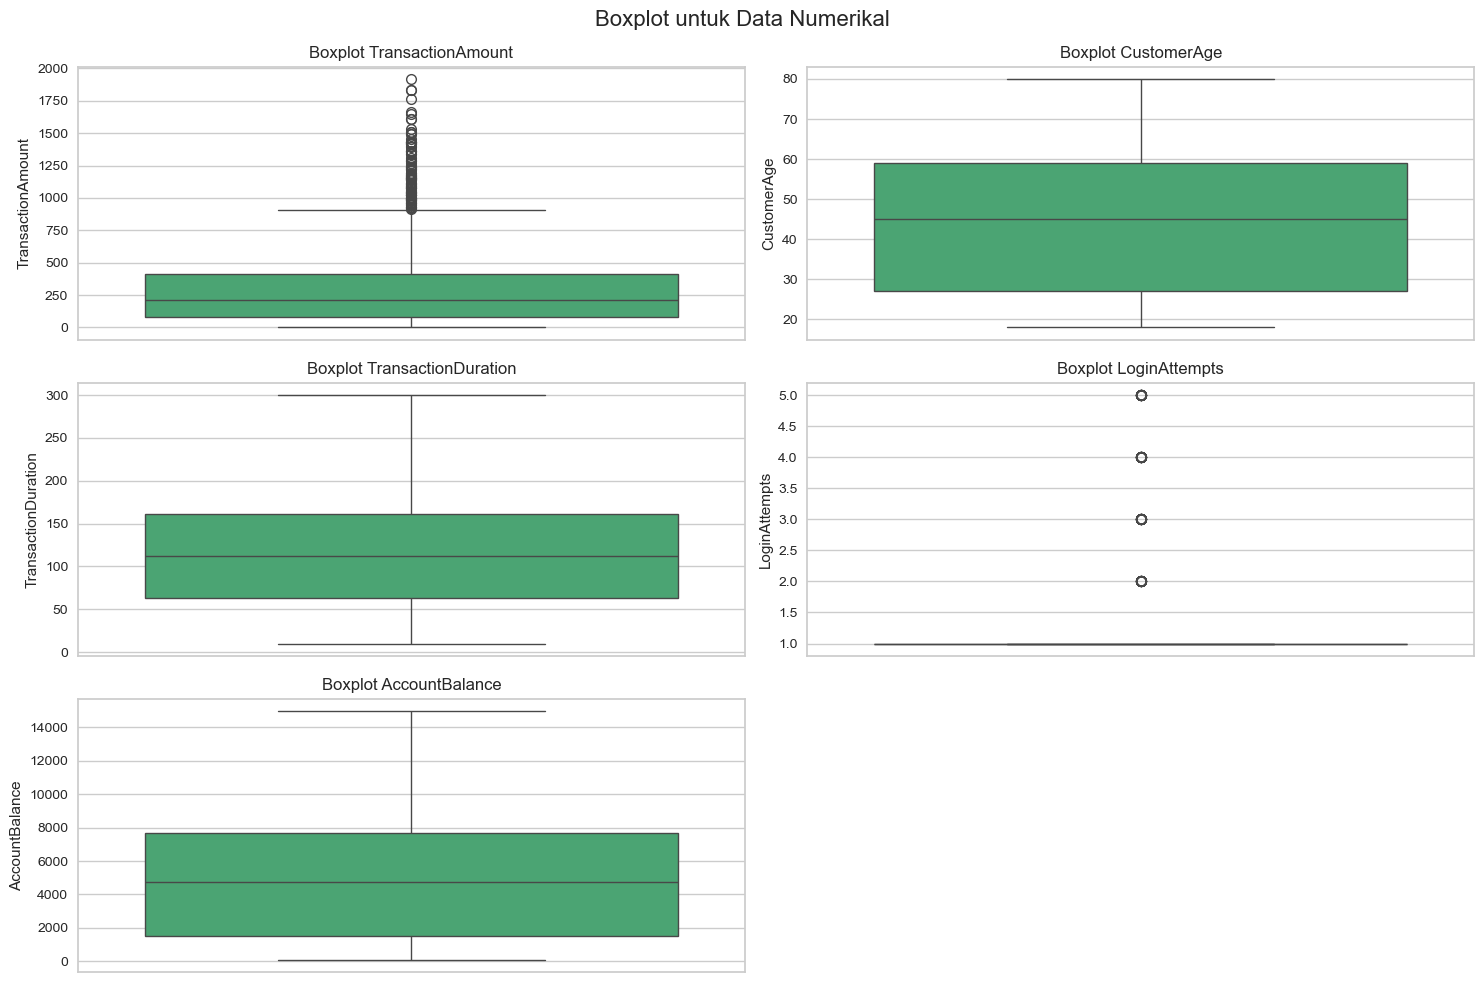

In [8]:
# Memilih kolom numerikal
numeric_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Membuat boxplot untuk masing-masing kolom numerikal
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, y=column, color='mediumseagreen')
    plt.title(f'Boxplot {column}')
    plt.ylabel(column)
    plt.xlabel('')

plt.suptitle('Boxplot untuk Data Numerikal', fontsize=16)
plt.tight_layout()
plt.show()

**Insights:**</br>
- Teridentifikasi terdapat 2 boxplot yang memiliki outlier yang signifikan yakni pada boxplot TransactionAmount dan LoginAtempts.
  *  Boxplot TransactionAmout:
  Distribusi menunjukkan banyak outlier di atas upper whisker. Hal ini mengindikasikan adanya transaksi dengan jumlah yang sangat besar (relatif tidak wajar) dibandingkan mayoritas. Kegiatan transaksi ini dapat menandakan pola pembelian barang mewah, investasi besar, atau bahkan aktivitas mencurigakan seperti fraud. Investigasi lebih lanjut dapat dilakukan untuk memahami konteksnya.
  *  Boxplot LoginAttempts:
  Distribusi menunjukan terdapat outlier, di mana sebagian pengguna mencoba login lebih dari 1x lebih banyak dari biasanya. Hal ini mengindikasikan masalah seperti kesulitasn teknis, lupa password, atau aktivitas mecurigakan seperti pembobolan password (brute force login). Oleh karena itu perlu dilakukan penanganan untuk pengguna yang melakukan loginattemps lebih dari 1x untuk mencegah potensi fraud dengan cara meningkatkan sistem keamanan untuk mendeteksi dan mencegah upaya yang tidak sah.

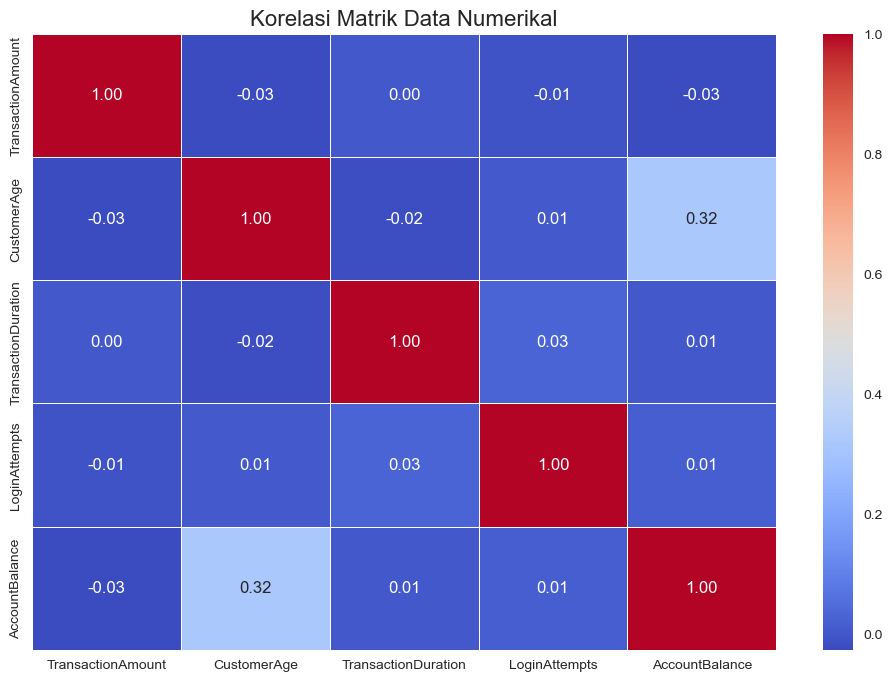

In [9]:
# Menghitung matriks korelasi
numeric_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
correlation_matrix = df[numeric_columns].corr()

# Menampilkan matriks korelasi dalam bentuk heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Korelasi Matrik Data Numerikal", fontsize=16)
plt.show()

**Insights:**</br>
- Korelasi yang paling signifikan adalah antara CustomerAge dengan AccountBalance dengan nilai korelasi positif moderat sebesar 0,32. Artinya, seiring bertambahnya usia, pelanggan cenderung memiliki saldo akun yang lebih besar. Peristiwa ini masuk akal karena pelanggan usia lebih tua mungkin memiliki penghasilan yang lebih stabil atau aset yang lebih besar dibandingkan pelanggan usia muda.
- Sebagian besar pasangan variabel menunjukkan korelasi yang sangat rendah (antara -0,03 hingga 0,00). Artinya, korelasi antar variabel numerikal dalan dataset df(bank_transaction_data_2.csv) ini lemah atau hampir tidak ada. Peristiwa ini menunjukkan bahwa masing-masing variabel cenderung memberikan informasi unik tanpa redundansi. Kemungkinan besar lebih dipengaruhi oleh faktor eskternal lainnya.

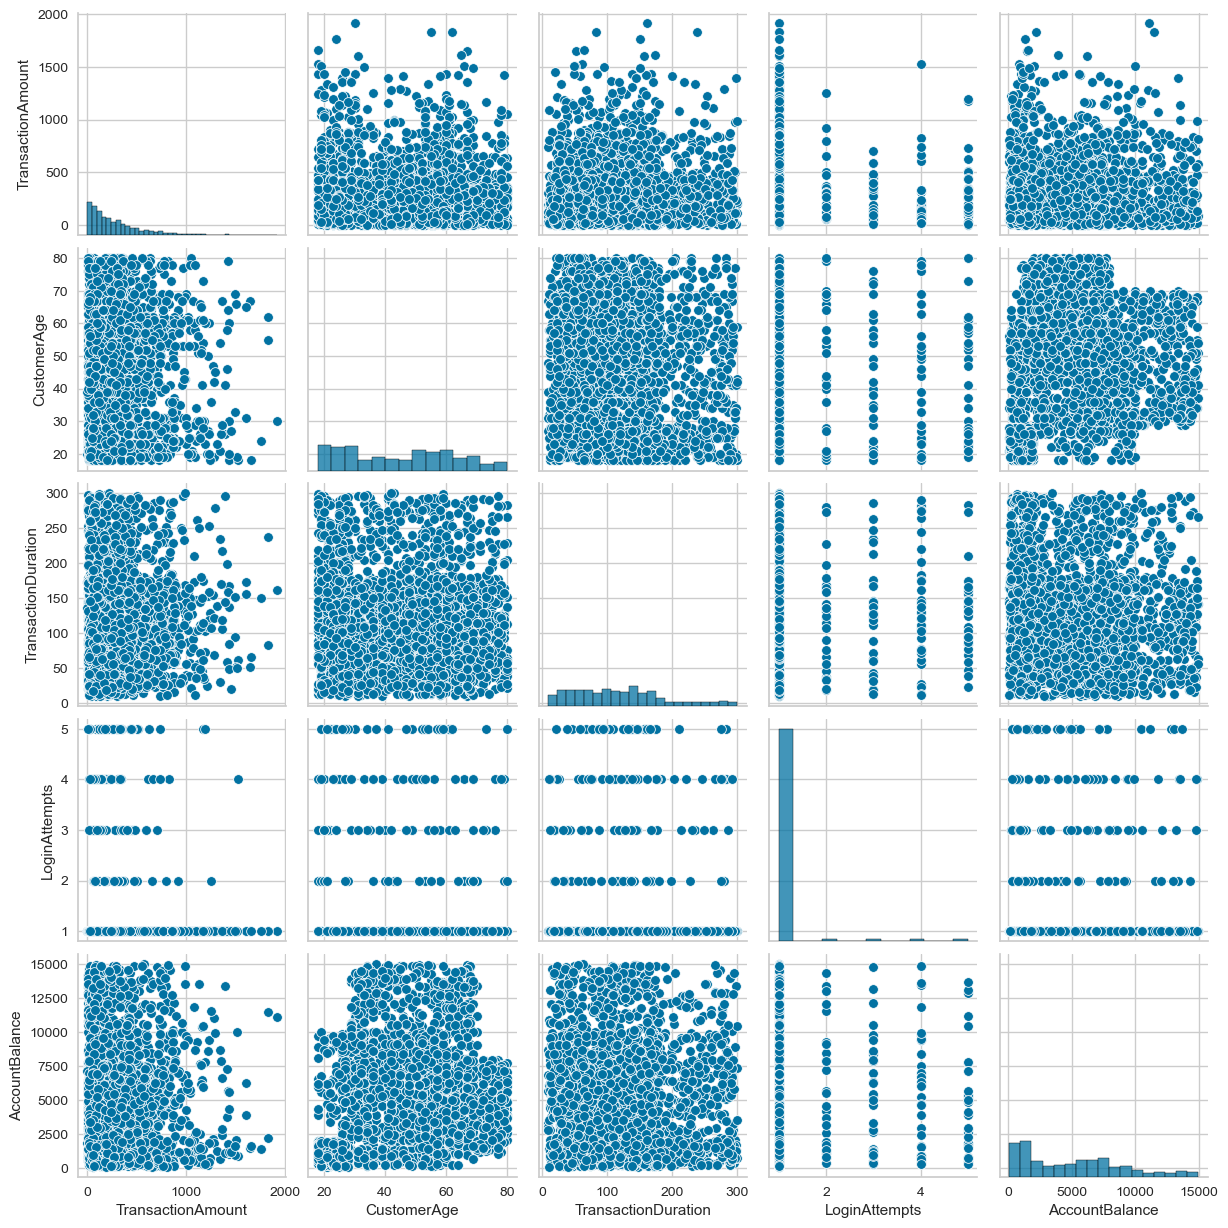

In [10]:
# Subset data untuk kolom numerik
numeric_df = df[numeric_columns]

# Pairplot untuk fitur numerik
sns.pairplot(data=numeric_df)
plt.show()

**Insights:**</br>
- Scatter plot antara TransactionAmount dan CustomerAge menunjukkan bahwa jumlah transaksi tidak bergantung pada usia pelanggan. Distribusi data yang tersebar luas mengindikasikan bahwa pelanggan dari semua kelompok usia memiliki tingkat aktivitas transaksi yang derupa sehingga tidak memiliki pola khusus
- Scatter plot antara AccountBalance dan TransactionAmount menunjukkan bahwa semakin besar saldo akun pelanggan, cenderung melakukan transaksi dengan jumlah yang lebih besar pula. Hal ini bisa menjadi indikator penting untuk memahami perilaku pelanggan dengan tingkat ekonomi yang lebih baik —mungkin lebih aktif dalam transaksi besar

4. Visualisasi Data

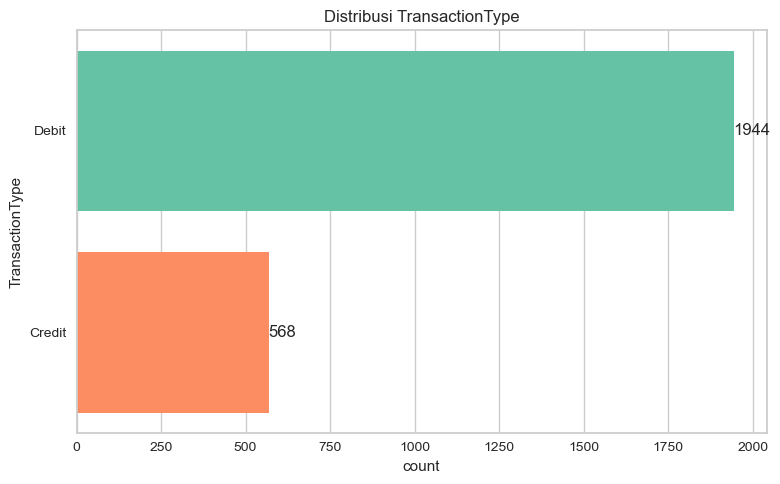

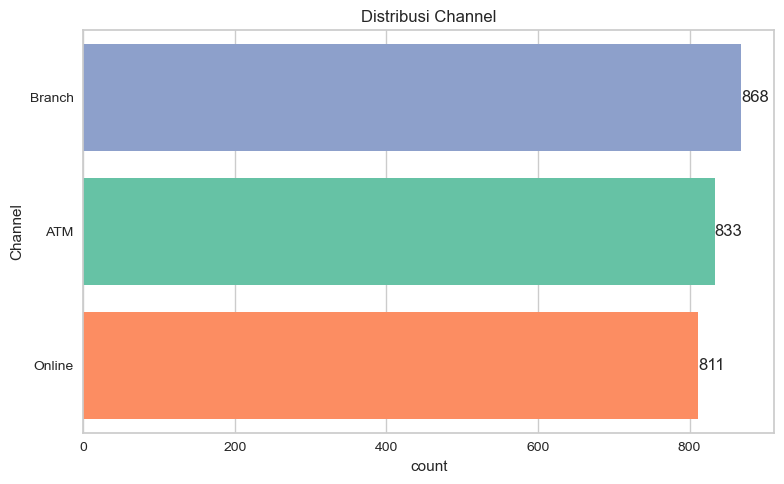

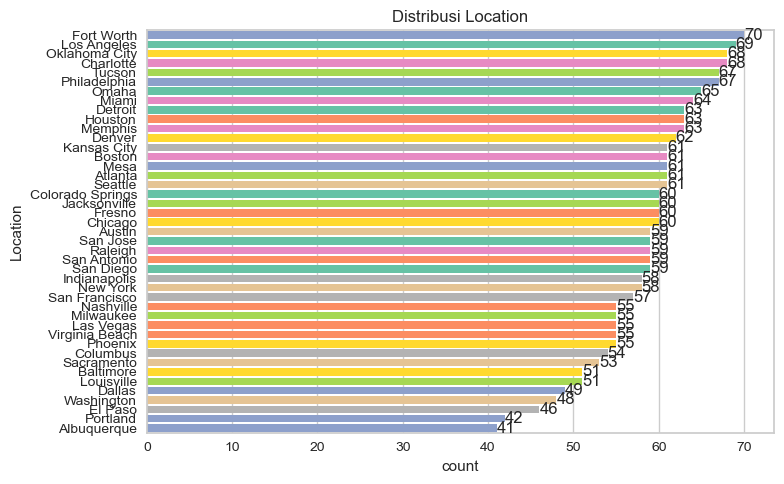

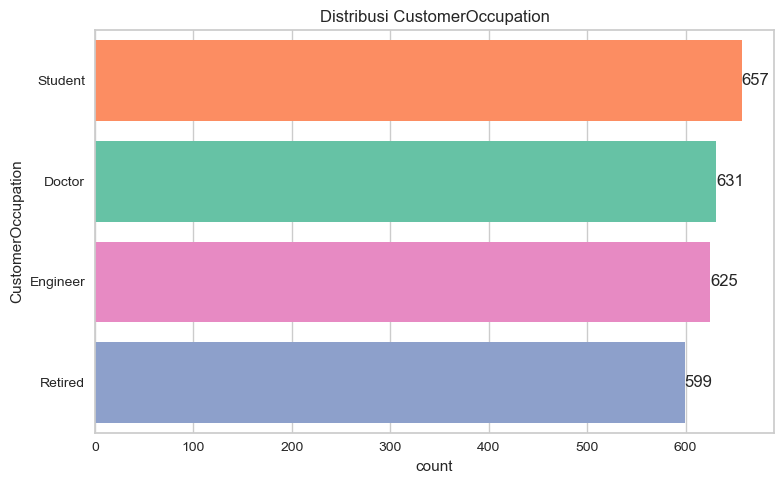

In [11]:
# Variabel kategorikal yang dipilih untuk divisualisasikan
categorical_columns = ['TransactionType', 'Channel', 'Location', 'CustomerOccupation']

# Buat visualisasi untuk masing-masing variabel kategorikal
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, y=col, hue=col, order=df[col].value_counts().index, palette='Set2', saturation=1)
    plt.title(f'Distribusi {col}')

    # Tambahkan label nilai
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')

    plt.tight_layout()
    plt.show()

**Insights:**</br>
- Jenis transaksi Debit dominan dilakukan daripada Kredit
- Metode transaksi (channel) yang sering dilakukan oleh pengguna berturut-turut (dominan ke sedikit) adalah Branch, ATM, dan Online
- Top 5 teratas lokasi (nama kota di US) yang mendominasi melakukan lebih banyak transaksi adalah Forth Worth, Los Angeles, Oklahoma City, Charlotte,dan Philadelphia
- Sebaran data pekerjaan pelanggan didominasi oleh mahasiswa/pelajar, dokter, teknisi, dan pensiunan

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

1. Menghapus atau Menangani Data Kosong (Missing Values)

In [12]:
# Menangani Data yang Hilang (Missing Values)
print("\nMenangani Data yang Hilang (Missing Values):")
df.isnull().sum()


Menangani Data yang Hilang (Missing Values):


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

**Insight:** Tidak ada data yang hilang (missing values) sehingga tidak perlu dilakukan penanganan missing values

2. Menghapus Data Duplikat

In [13]:
# Mengecek jumlah duplikasi data
print("Jumlah duplikasi data:", df.duplicated().sum())

Jumlah duplikasi data: 0


**Insight:** Tidak ditemukan adanya duplikasi data dalam dataset sehingga tidak perlu dilakukan penanganan duplikasi data

3. Mengubah Tipe Data

In [14]:
# Mengubah tipe data TransactionDate dan PreviousTransactionDate dari object ke datetime
df[['TransactionDate', 'PreviousTransactionDate']] = df[['TransactionDate', 'PreviousTransactionDate']].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

**Insights:** </br>
Kolom *TransactionDate* dan *PreviousTransactionDate* diubah menjadi tipe *datetime* untuk mempermudah analisis berbasis waktu seperti menghitung interval antar transaksi dan mengidentifikasi pola aktivitas pelanggan. Variabel numerik seperti *TransactionAmount*, *AccountBalance*, *CustomerAge*, dan *LoginAttempts* sudah dalam format yang sesuai untuk analisis statistik serta pemodelan dalam *machine learning*.

4. Deteksi dan Penanganan Outlier

Jumlah outlier di 'TransactionAmount': 113
Jumlah outlier di 'CustomerAge': 0
Jumlah outlier di 'TransactionDuration': 0
Jumlah outlier di 'LoginAttempts': 122
Jumlah outlier di 'AccountBalance': 0


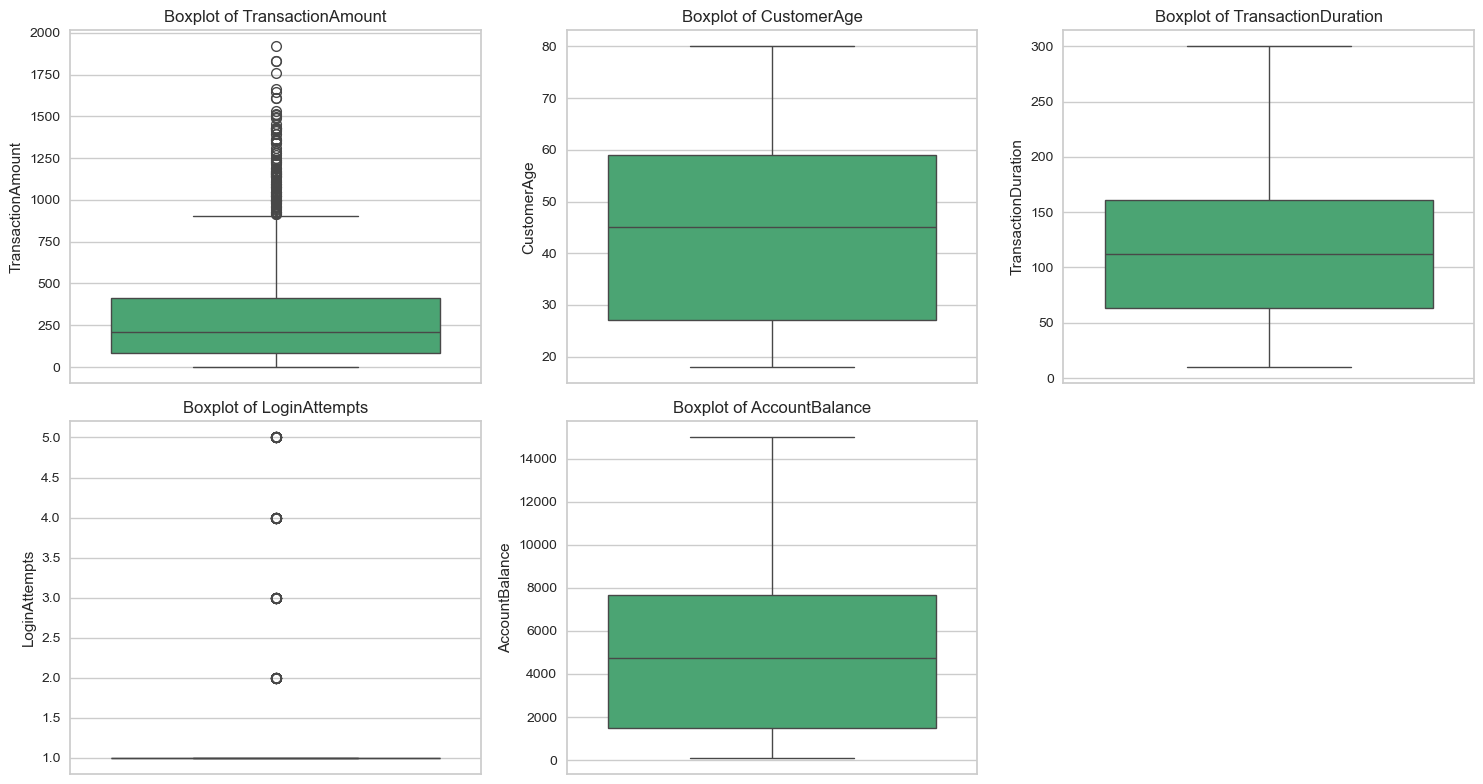

Jumlah outlier sebelum transformasi log: 113
Jumlah outlier sesudah transformasi log: 44


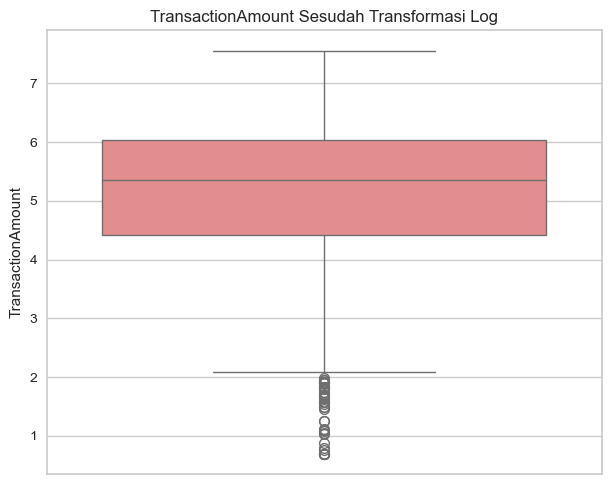

In [15]:
# Menentukan kolom numerik untuk dilakukan mengecek outlier
numeric_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Menampilkan jumlah outlier untuk setiap atribut numerik
outlier_counts = {}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Deteksi outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

# Menampilkan jumlah outlier per atribut numerik
for col, count in outlier_counts.items():
    print(f"Jumlah outlier di '{col}': {count}")

# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, (len(numeric_columns) + 1) // 2, i)
    sns.boxplot(y=df[col], color='mediumseagreen')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Penanganan Outlier TransactionAmount Menggunakan transformasi log
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_before = df[(df['TransactionAmount'] < lower_bound) | (df['TransactionAmount'] > upper_bound)]
print(f"Jumlah outlier sebelum transformasi log: {outliers_before.shape[0]}")

# Menangani nilai nol atau negatif sebelum transformasi log
df['TransactionAmount'] = df['TransactionAmount'].clip(lower=1)
df['TransactionAmount'] = np.log1p(df['TransactionAmount'])

Q1_log = df['TransactionAmount'].quantile(0.25)
Q3_log = df['TransactionAmount'].quantile(0.75)
IQR_log = Q3_log - Q1_log
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log
outliers_after = df[(df['TransactionAmount'] < lower_bound_log) | (df['TransactionAmount'] > upper_bound_log)]
print(f"Jumlah outlier sesudah transformasi log: {outliers_after.shape[0]}")

# Visualisasi Boxplot Sebelum & Sesudah
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
sns.boxplot(y=df['TransactionAmount'], color='lightcoral')
plt.title('TransactionAmount Sesudah Transformasi Log')

plt.tight_layout()
plt.show()

**Insights:**
*  Tahapan deteksi dan penanganan outlier dilakukan terlebih dahulu sebelum tahapan normalisasi atau standardisasi fitur karena nilai-nilai yang sudah diubah skalanya oleh StandardScaler tidak berpengaruh secara signifikan oleh transformasi log
*  Berdasarkan visualisasi boxplot, ditemukan 2 kolom numerik yang memiliki outlier yakni TransactionAmount sebesar 113 dan LoginAttemps sebesar 122
*  Kolom numerik TransactionAmount memiliki outlier sebesar 113 mengindikasi bahwa adanya transaksi tidak wajar atau mencurigakan. Namun setelah dilakukan transformasi log, nilai outlier menurun menjadi 44 sehingga distribusi data menjadi agak lebih seimbang
*  Transformasi log mengurangi dampak nilai ekstrem dengan memampatkan skalanya, tetapi tidak sepenuhnya menghilangkan outlier karena sifatnya yang mempertahankan posisi relatif data dalam distribusi
*  Outlier pada kolom LoginAttemps tidak dilakukan penanganan karena dapat menjadi fitur penting dalam mendeteksi anomali untuk menemukan akun yang mungkin sedang diretas

5. Encoding Data Kategorikal

In [16]:
# Tampilkan informasi awal dataset
print("Data sebelum encoding:")
display(df.head())

Data sebelum encoding:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,2.714032,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,5.932882,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,4.846468,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,5.223055,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,2.670694,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [17]:
# Identifikasi kolom kategorikal yang dipilih untuk diencoding
categorical_columns = ['TransactionType', 'Channel', 'Location', 'CustomerOccupation']

# Validasi keberadaan kolom
missing_columns = [col for col in categorical_columns if col not in df.columns]
if missing_columns:
    print(f"Kolom berikut tidak ditemukan dalam DataFrame: {missing_columns}")
else:
    # Lakukan One-Hot Encoding
    df = pd.get_dummies(df, columns=categorical_columns)

    # Menampilkan hasil encoding
    encoded_columns = [col for col in df.columns if any(cat in col for cat in categorical_columns)]
    print("Data setelah One-Hot Encoding:")
    display(df[encoded_columns].head())

Data setelah One-Hot Encoding:


,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,Location_Albuquerque,Location_Atlanta,Location_Austin,Location_Baltimore,Location_Boston,...,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


**Insights:**
- One-Hot Encoding dipilih karena variabel kategorikal dalam dataset dapat diubah menjadi bentuk biner (0 dan 1) tanpa memperkenalkan bias antar kategori
- Terjadi peningkatan jumlah kolom setelah One-Hot Encoding dilakukan yakni dari 16 kolom menjadi 52 kolom

6. Normalisasi atau Standardisasi Fitur

In [18]:
# Standardisasi fitur menggunakan StandardScaler
# Kolom numerik yang akan di-scale
numeric_columns = [ 'TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# 1. Buat salinan data asli
df_original = df.copy()  # Backup data original

# 2. Inisialisasi Scaler
scaler = StandardScaler()

# 3. SCALING PADA SALINAN DATA (TANPA MENGUBAH DATA ASLI)
df_scaled = df.copy()  # Buat salinan untuk data scaled
df_scaled[numeric_columns] = scaler.fit_transform(df_original[numeric_columns])  # Fit & transform pada salinan

# 4. VERIFIKASI
print("Data Original (Belum di-Scale):")
display(df_original[numeric_columns].head())

print("\nData Scaled (Telah di-Standardisasi):")
display(df_scaled[numeric_columns].head())

print("\nStatistik Deskriptif Data Scaled:")
display(df_scaled[numeric_columns].describe())

Data Original (Belum di-Scale):


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,2.714032,70,81,1,5112.21
1,5.932882,68,141,1,13758.91
2,4.846468,19,56,1,1122.35
3,5.223055,26,25,1,8569.06
4,2.670694,26,198,1,7429.40



Data Scaled (Telah di-Standardisasi):


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-1.997884,1.423718,-0.552443,-0.206794,-0.000537
1,0.647546,1.311287,0.305314,-0.206794,2.216472
2,-0.245329,-1.443277,-0.909842,-0.206794,-1.023534
3,0.064171,-1.049768,-1.353017,-0.206794,0.885797
4,-2.033502,-1.049768,1.120184,-0.206794,0.593589



Statistik Deskriptif Data Scaled:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03
mean,2.531591e-16,9.900078e-18,7.637203e-17,1.527441e-16,4.985396e-17
std,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00
min,-3.658761e+00,-1.499493e+00,-1.567456e+00,-2.067936e-01,-1.285344e+00
25%,-5.979196e-01,-9.935526e-01,-8.097706e-01,-2.067936e-01,-9.255845e-01
50%,1.744571e-01,1.832826e-02,-1.021205e-01,-2.067936e-01,-9.712227e-02
75%,7.269929e-01,8.053467e-01,5.912336e-01,-2.067936e-01,6.575405e-01
max,1.984917e+00,1.985874e+00,2.578372e+00,6.431745e+00,2.529043e+00


**Insights:**
- Standardisasi dilakukan untuk mengubah data sehingga rata-rata menjadi atau mendekati 0 dan standar deviasi menjadi 1. Dalam kasus ini, dibuktikan pada tampilan analisis deskriptif untuk kolom numerik (di atas) bahwa nilai standar deviasi memiliki nilai 1. Hal ini membantu model dengan skala berbeda menjadi skala yang sama sehingga lebih ideal untuk proses pelatihannya nanti.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [19]:
# Pastikan semua kolom dalam selected_features ada di DataFrame
selected_features = [
    "TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance",
    "TransactionType_Credit", "TransactionType_Debit", "Channel_ATM", "Channel_Branch", "Channel_Online"
]

# Filter kolom yang hanya tersedia di DataFrame untuk menghindari error
available_features = [col for col in selected_features if col in df.columns]
if len(available_features) < len(selected_features):
    missing_features = set(selected_features) - set(available_features)
    print(f"Kolom berikut tidak ditemukan di dataset: {missing_features}")

# Pilih hanya kolom yang tersedia
X = df.loc[:, available_features].values # Gunakan .loc untuk akses yang lebih aman

# Output untuk memastikan fitur yang dipilih benar
print("Fitur yang dipilih untuk K-Means:")
print(available_features)

# Tentukan jumlah cluster
num_clusters = 3

# Inisialisasi dan latih model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Menampilkan distribusi data per cluster
print("Distribusi Data dalam Setiap Klaster:")
print(df['Cluster'].value_counts())

Fitur yang dipilih untuk K-Means:
['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionType_Credit', 'TransactionType_Debit', 'Channel_ATM', 'Channel_Branch', 'Channel_Online']
Distribusi Data dalam Setiap Klaster:
Cluster
1    1150
2     942
0     420
Name: count, dtype: int64


**Insights:**
- Cluster 1 dengan jumlah data tertinggi (1150) menunjukkan populasi pengguna terbesar, kemungkinan memiliki perilaku transaksi yang umum terjadi. Cluster 2 memiliki jumlah data sedang (942), mungkin mengindikasikan segmen pengguna dengan pola transaksi yang lebih spesifik atau berbeda dari Cluster 1. Namun, Cluster 0 dengan jumlah data paling sedikit (420) mungkin mencerminkan pengguna dengan pola transaksi yang tidak biasa, seperti jumlah transaksi yang sangat tinggi, penggunaan channel usage tertentu yang dominan (misalnya, ATM), atau frekuensi login. 
- Pemilihan fitur TransactionAmount, AccountBalance, Channel Usage(ATM, Online, atau Branch), LoginAttempts dan TransactionDuration dipilih untuk pembagian cluster karena dapat digunakan untuk membedakan mana pola transaksi yang mencurigakan dan tidak.  

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

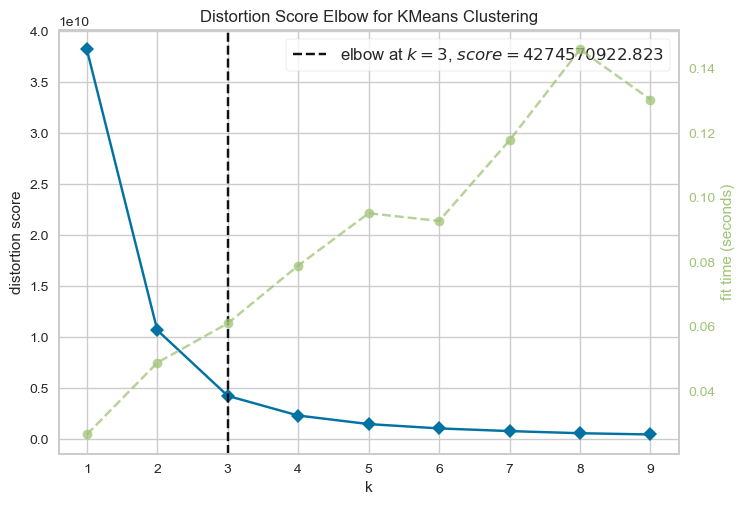

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Menggunakan Elbow Method dengan Yellowbrick

# Inisialisasi objek KMeans dengan parameter dasar
kmeans = KMeans(random_state=42, n_init=10)

# KElbowVisualizer membantu menemukan jumlah cluster optimal dengan mencoba dari 1 sampai 10 cluster
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)      # Melatih visualizer dengan data X
visualizer.show()      # Menampilkan grafik Elbow

Silhouette Score untuk 2 cluster: 0.6278
Silhouette Score untuk 3 cluster: 0.6395
Silhouette Score untuk 4 cluster: 0.6211
Silhouette Score untuk 5 cluster: 0.6051
Silhouette Score untuk 6 cluster: 0.5811
Silhouette Score untuk 7 cluster: 0.5433
Silhouette Score untuk 8 cluster: 0.5435
Silhouette Score untuk 9 cluster: 0.5417
Silhouette Score untuk 10 cluster: 0.5323


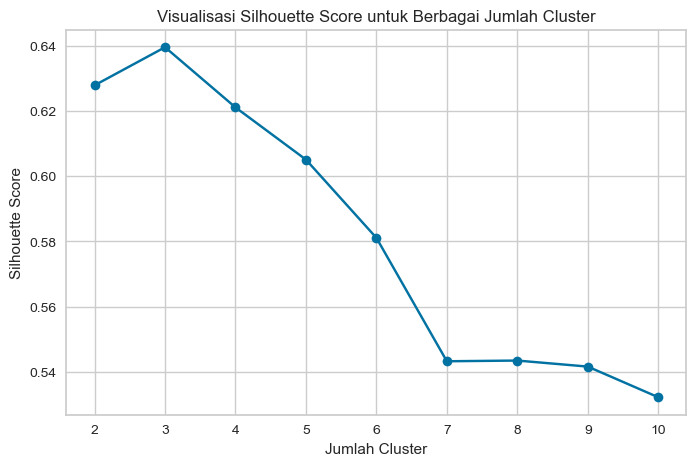

In [21]:
# Menghitung Silhouette Score untuk berbagai jumlah cluster
silhouette_scores = []        # List untuk menyimpan nilai silhouette score
cluster_range = range(2, 11)   # Mencoba jumlah cluster dari 2 hingga 10

# Melakukan iterasi untuk setiap jumlah cluster dalam rentang tersebut
for k in cluster_range:
    # Inisialisasi model KMeans dengan k cluster
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Melatih model dan mengasign label cluster untuk data X
    labels = kmeans.fit_predict(X)
    
    # Hitung nilai silhouette score untuk k cluster
    score = silhouette_score(X, labels)
    
    # Simpan nilai silhouette score ke dalam list
    silhouette_scores.append(score)
    
    # Tampilkan hasil score untuk jumlah cluster saat ini
    print(f"Silhouette Score untuk {k} cluster: {score:.4f}")

# Visualisasi Silhouette Score berdasarkan jumlah cluster
plt.figure(figsize=(8, 5))
plt.plot(list(cluster_range), silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Visualisasi Silhouette Score untuk Berbagai Jumlah Cluster")
plt.grid(True)
plt.show()

**Insights:**
- Berdasarkan evaluasi menggunakan elbow method, diperoleh jumlah kluster optimal (k) = 3 dengan skor = 4274570922. Jumlah kluster optimal (k) yang diperoleh dari silhoutte score sebagai ukuran kualitas skor juga berada pada pembagian 3 kluster dengan k= 0,6395. 

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [22]:
# Fitur yang sudah di-encoding (one-hot encoding) dan akan digunakan
selected_features = [
    "TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance",
    "TransactionType_Credit", "TransactionType_Debit", "Channel_ATM", "Channel_Branch", "Channel_Online"
]

# Pastikan fitur–fitur tersebut ada di DataFrame df
available_features = [col for col in selected_features if col in df.columns]
if len(available_features) < len(selected_features):
    missing_features = set(selected_features) - set(available_features)
    print(f"Kolom berikut tidak ditemukan di dataset: {missing_features}")

# Ambil data fitur dan lakukan standarisasi
X = df[available_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering Awal (Sebelum Feature Selection) 
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_before = kmeans.fit_predict(X_scaled)
silhouette_before = silhouette_score(X_scaled, labels_before)
print(f"Silhouette Score sebelum feature selection: {silhouette_before:.4f}")

# Feature Selection 
# Menggunakan RandomForest dan Mutual Information untuk menentukan fitur penting
# Karena dataset tidak memiliki target sesungguhnya, digunakan label clustering sebagai pseudo-target
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, labels_before)
rf_importance = rf.feature_importances_

# Hitung skor mutual information
mi_scores = mutual_info_classif(X_scaled, labels_before, discrete_features=False)

# Kombinasikan kedua skor (dengan memberi bobot yang sama) dan hitung rata-rata
feature_scores = (rf_importance + mi_scores) / 2

# Urutkan indeks berdasarkan skor tertinggi (descending)
sorted_idx = np.argsort(feature_scores)[::-1]

# Misalnya, dipilih 5 fitur teratas
top_n = 5
important_features = [available_features[i] for i in sorted_idx[:top_n]]
print("\nFitur terpilih berdasarkan feature selection:", important_features)

# Clustering Ulang (Setelah Feature Selection)
X_selected = df[important_features].values
X_selected_scaled = scaler.fit_transform(X_selected)  # Standarisasi kembali fitur terpilih
kmeans_selected = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_after = kmeans_selected.fit_predict(X_selected_scaled)
silhouette_after = silhouette_score(X_selected_scaled, labels_after)
print(f"Silhouette Score setelah feature selection: {silhouette_after:.4f}")

# Perbandingan Performa
print("\nPerbandingan Model:")
print(f"Silhouette Score sebelum feature selection: {silhouette_before:.4f}")
print(f"Silhouette Score setelah feature selection: {silhouette_after:.4f}")

Silhouette Score sebelum feature selection: 0.2327

Fitur terpilih berdasarkan feature selection: ['Channel_ATM', 'TransactionType_Debit', 'TransactionType_Credit', 'Channel_Branch', 'Channel_Online']
Silhouette Score setelah feature selection: 0.6576

Perbandingan Model:
Silhouette Score sebelum feature selection: 0.2327
Silhouette Score setelah feature selection: 0.6576


Rata-Rata Fitur per Cluster:
         Channel_ATM  TransactionType_Debit  TransactionType_Credit  \
Cluster                                                               
0           0.338095               0.759524                0.240476   
1           0.351304               0.775652                0.224348   
2           0.304671               0.778132                0.221868   

         Channel_Branch  Channel_Online  
Cluster                                  
0              0.335714        0.326190  
1              0.332174        0.316522  
2              0.366242        0.329087  


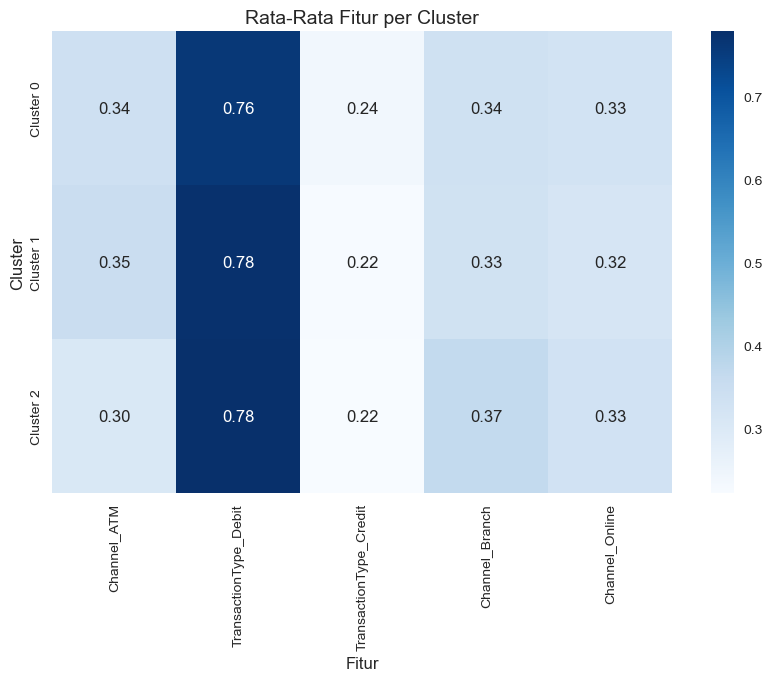

In [23]:
# Hitung rata-rata fitur per cluster
cluster_means = df.groupby('Cluster')[important_features].mean()

print("Rata-Rata Fitur per Cluster:")
print(cluster_means)

# Visualisasi heatmap untuk melihat pola fitur per cluster
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap='Blues', xticklabels=important_features, yticklabels=[f'Cluster {i}' for i in range(optimal_k)])
plt.title('Rata-Rata Fitur per Cluster', fontsize=14)
plt.xlabel('Fitur', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.show()

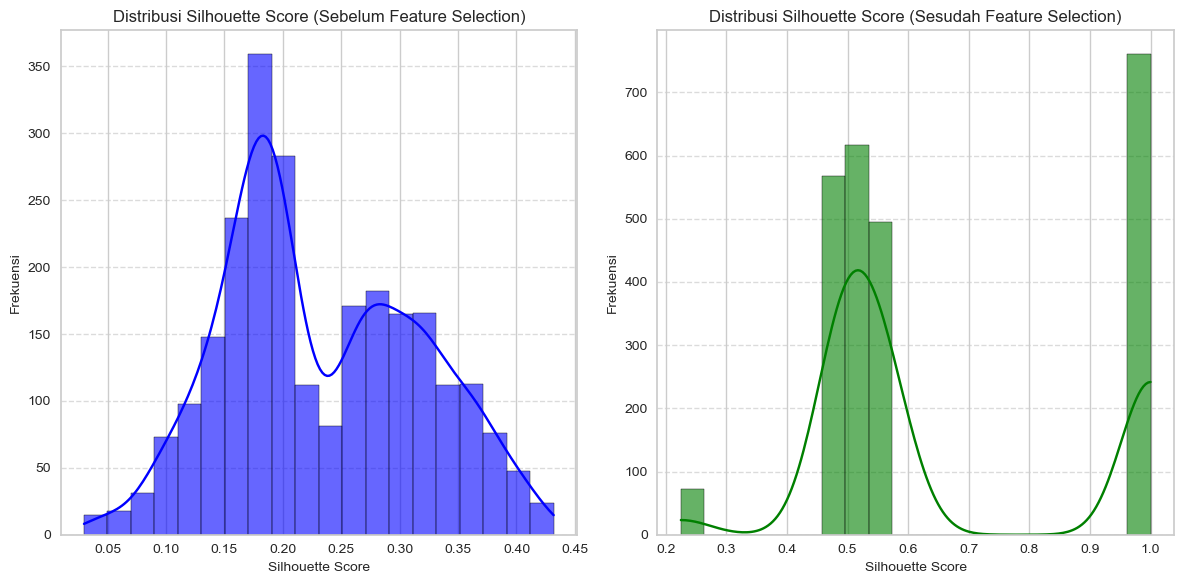

In [24]:
from sklearn.metrics import silhouette_samples

# Hitung Silhouette Score untuk setiap data poin sebelum dan sesudah feature selection
silhouette_values_before = silhouette_samples(X_scaled, labels_before)
silhouette_values_after = silhouette_samples(X_selected_scaled, labels_after)

# Visualisasi distribusi dengan histogram dan density plot
plt.figure(figsize=(12, 6))

# Distribusi sebelum feature selection
plt.subplot(1, 2, 1)
sns.histplot(silhouette_values_before, kde=True, color='blue', bins=20, alpha=0.6)
plt.title('Distribusi Silhouette Score (Sebelum Feature Selection)', fontsize=12)
plt.xlabel('Silhouette Score', fontsize=10)
plt.ylabel('Frekuensi', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Distribusi setelah feature selection
plt.subplot(1, 2, 2)
sns.histplot(silhouette_values_after, kde=True, color='green', bins=20, alpha=0.6)
plt.title('Distribusi Silhouette Score (Sesudah Feature Selection)', fontsize=12)
plt.xlabel('Silhouette Score', fontsize=10)
plt.ylabel('Frekuensi', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()

**Insights:**
- Saat dilakukan pemodelan pada fitur-fitur penting sebelum feature selection, silhoutte score adalah 0,2327 yang menunjukkan bahwa kualitas klasterisasi yang rendah sehingga model belum mampu memisahkan data ke dalam kluster yang bermakna (hasil analisis sulit diinterpretasikan).
- Setelah dilakukan feature selection pada fitur-fitur penting menggunakan RF dan mutual information, silhoutte score meningkat menjadi 0,6576. Dengan kualitas klasterisasi yang cukup tinggi, model diharapkan mampu melakukan pembagian data dengan jelas sehingga lebih mudah diinterpretasi.
- Setelah proses feature selection dilakukan, terpilih fitur-fitur penting sebagai pendukung pendeteksian kemungkinan terjadinya fraud. Adapun penjelasan detailnya sebagai berikut.
    - Channel_ATM memberikan informasi tentang cara nasabah bertransaksi menggunakan ATM
    - Channel_Online dan Channel_Branch menekankan informasi pentingnya saluran (fisik vs digital) dalam membedakan pola pelanggan
    - TransactionType_Debit dan TransactionType_Credit memberikan informasi tentang jenis transaksi yang menjadikannya peran utama dalam pembentukan kluster

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

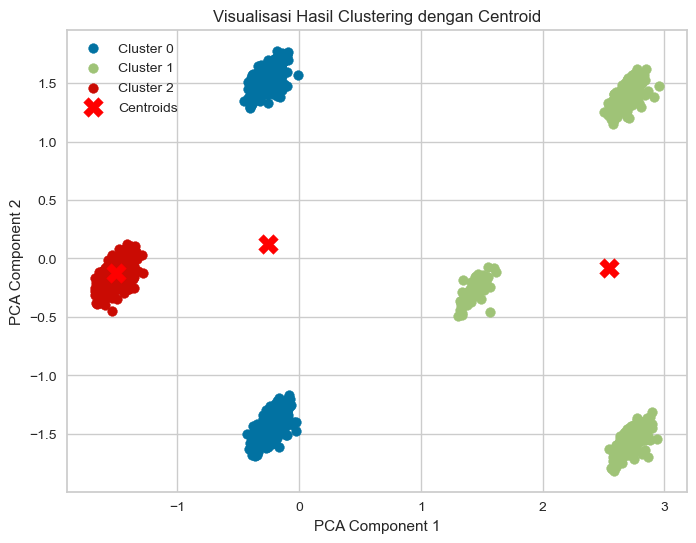

Nilai centroid untuk setiap cluster:
Centroid Cluster 0:
  TransactionAmount: -0.0240
  CustomerAge: -0.0545
  TransactionDuration: -0.0198
  LoginAttempts: -0.0162
  AccountBalance: -0.0107
  TransactionType_Credit: -0.5405
  TransactionType_Debit: 0.5405
  Channel_ATM: -0.7044
  Channel_Branch: 0.3692
  Channel_Online: 0.3337
Centroid Cluster 1:
  TransactionAmount: 0.0457
  CustomerAge: 0.0832
  TransactionDuration: -0.0036
  LoginAttempts: 0.0328
  AccountBalance: 0.0346
  TransactionType_Credit: 1.8500
  TransactionType_Debit: -1.8500
  Channel_ATM: -0.4314
  Channel_Branch: 0.2026
  Channel_Online: 0.2283
Centroid Cluster 2:
  TransactionAmount: 0.0033
  CustomerAge: 0.0227
  TransactionDuration: 0.0335
  LoginAttempts: 0.0007
  AccountBalance: -0.0092
  TransactionType_Credit: -0.5405
  TransactionType_Debit: 0.5405
  Channel_ATM: 1.4197
  Channel_Branch: -0.7266
  Channel_Online: -0.6905
Kontribusi fitur terhadap masing-masing komponen PCA:
                        PCA Component

In [25]:
# Fitur yang dipilih untuk clustering
selected_features = [
    "TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance",
    "TransactionType_Credit", "TransactionType_Debit", "Channel_ATM", "Channel_Branch", "Channel_Online"
]

# Filter fitur yang tersedia di dataset
available_features = [col for col in selected_features if col in df.columns]
if len(available_features) < len(selected_features):
    missing_features = set(selected_features) - set(available_features)
    print(f"Kolom berikut tidak ditemukan di dataset: {missing_features}")

# Ambil data dari fitur yang tersedia dan lakukan standarisasi
X = df.loc[:, available_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering 
optimal_k = 3  # Jumlah cluster optimal, hasil dari Elbow Method dan silhoutte score
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Tambahkan label cluster ke DataFrame
df['Cluster'] = labels

# Proyeksi PCA ke 2D untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Proyeksi centroid ke ruang PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Visualisasi Scatter Plot dengan Centroid 
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(X_pca[labels == cluster, 0],
                X_pca[labels == cluster, 1],
                label=f'Cluster {cluster}')
# Tambahkan centroid ke scatter plot
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            color='red', marker='X', s=200,
            label='Centroids')

plt.title("Visualisasi Hasil Clustering dengan Centroid")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan Nilai Centroid
print("Nilai centroid untuk setiap cluster:")
for cluster_index, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Centroid Cluster {cluster_index}:")
    for feature_name, value in zip(available_features, centroid):
        print(f"  {feature_name}: {value:.4f}")

        
# Mendapatkan kontribusi (loading scores) fitur terhadap komponen PCA
loading_scores = pd.DataFrame(
    pca.components_, 
    columns=available_features, 
    index=["PCA Component 1", "PCA Component 2"]
)

print("Kontribusi fitur terhadap masing-masing komponen PCA:")
print(loading_scores.T)

**Insights:**
- Centroid Cluster 0 menunjukkan dominasi transaksi debit (TransactionType_Debit: 0,5405) dengan preferensi 3 channel transaksi berturut-turut berdasarkan nilai terbesar adalah Branch: 0,3692; Online: 0,3337; dan ATM: -0,7044. Sementara nilai centroid untuk fitur lainnya seperti TransactionAmount dan CustomerAge berada di dekat titik netral (0) yang mencerminkan aktivitas cenderung normal. Oleh sebab itu, risiko fraud lebih kecil terdeteksi dalam cluster 0 karena data menunjukkan distribusi transaksi yang tidak fokus pada satu metode tertentu atau nilai transaksi yang mencurigakan. 
- Centroid Cluster 2 sangat menonjol dalam penggunaan channelATM (ChannelATM: 1.4197) dan transaksi debit (TransactionType_Debit: 0.5405). Sedangkan Channel Bank Branch dan Online memiliki kontribusi yang jauh lebih kecil. Sementara, nilai centroid untuk fitur lainnya seperti CustomerAge dan TransactionAmount memiliki nilai rata-rata yang mendekati 0. Oleh karena itu, risiko fraud lebih kecil terdeteksi dan nominal/jumlah transaksi juga tidak menimbulkan kecurigaan dalam cluster ini.
- Centroid Cluster 1 menunjukkan dominasi yang menonjul untuk transaksi kredit (TransactionType_Credit: 1.8500) dibandingkan debit dan channel dominan adalah Bank Branch (Channel_Branch: 0.2026) serta online (Channel_Online: 0.2283). Fenomena ini kemudian didukung oleh nilai centroid untuk fitur lainnya seperti TransactionAmount yang lebih tinggi dibandingkan cluster lain (0 dan 2), mencerminkan potensi transaksi bernilai besar. Oleh sebab itu, Cluster 1 memiliki risiko fraud yang lebih tinggi karena dominasi transaksi kredit di Channel yang lebih rentan terhadap penyalahgunaan, seperti branch dan online. Akibatnya, pengguna dengan jumlah/nilai transaksi besar dan preferensi channel online dapat menjadi target fraudster, terutama jika sistem keamanan kanal tidak diperkuat dengan tahapan verifikasi tambahan.
- Komponen PCA dimensi 1 sangat dipengaruhi oleh fitur TransactionType (Credit vs Debit). Hal ini berarti lebih berfokus pada perbedaan pola transaksi berbasis metode pembayaran, yang menunjukkan bahwa transaksi kredit memiliki kontribusi positif yang besar, sedangkan transaksi debit memiliki kontribusi negatif. 
- Komponen PCA dimensi ke-2 sangat dipengaruhi oleh fitur Channel transaksi (Branch dan Online). Hal ini berarti lebih berfokus kepada cara transaksi dilakukan -apakah melalui channel Branch atau Online. Transaksi di Branch memiliki kontribusi positif besar, sedangkan transaksi online memberikan kontribusi negatif.
- Kesimpulan yang diperoleh dari kombinasi kedua Komponen PCA yakni transaksi kredit yang dilakukan melalui channel digital seperti online menjadi lebih relevan untuk analisis fraud. Hal ini karena channel figital cenderung lebih rentan terhadap aktivitas mencurigakan sehingga mempermudah deteksi pola fraud.
- Fokus awal mendeteksi fraud: transaksi kredit di channel digital

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [26]:
# Menambahkan hasil label cluster
df['Cluster'] = kmeans.labels_

# Inverse One-Hot Encoding
for col in categorical_columns:
    # Ambil kolom one-hot encoding yang terkait dengan kategori
    one_hot_cols = [c for c in df.columns if c.startswith(col + "_")]

    # Kembalikan ke nilai kategorikal asli
    if one_hot_cols:
        df[col] = df[one_hot_cols].idxmax(axis=1).str.replace(col + "_", "")

        # Hapus kolom hasil one-hot encoding setelah inverse
        df.drop(columns=one_hot_cols, inplace=True)

# Standarisasi pada fitur numerik
numeric_columns = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_columns])
df_scaled = df.copy()
df_scaled[numeric_columns] = X_scaled

# Simulasi hasil clustering
df_scaled["Cluster"] = df["Cluster"]
df_scaled.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster,TransactionType,Channel,Location,CustomerOccupation
0,TX000001,AC00128,-1.997884,2023-04-11 16:29:14,D000380,162.198.218.92,M015,1.423718,-0.552443,-0.206794,-0.000537,2024-11-04 08:08:08,2,Debit,ATM,San Diego,Doctor
1,TX000002,AC00455,0.647546,2023-06-27 16:44:19,D000051,13.149.61.4,M052,1.311287,0.305314,-0.206794,2.216472,2024-11-04 08:09:35,2,Debit,ATM,Houston,Doctor
2,TX000003,AC00019,-0.245329,2023-07-10 18:16:08,D000235,215.97.143.157,M009,-1.443277,-0.909842,-0.206794,-1.023534,2024-11-04 08:07:04,0,Debit,Online,Mesa,Student
3,TX000004,AC00070,0.064171,2023-05-05 16:32:11,D000187,200.13.225.150,M002,-1.049768,-1.353017,-0.206794,0.885797,2024-11-04 08:09:06,0,Debit,Online,Raleigh,Student
4,TX000005,AC00411,-2.033502,2023-10-16 17:51:24,D000308,65.164.3.100,M091,-1.049768,1.120184,-0.206794,0.593589,2024-11-04 08:06:39,1,Credit,Online,Atlanta,Student


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [27]:
# Inverse transform untuk data numerik
df_inverse = df_scaled.copy()
df_inverse[numeric_columns] = scaler.inverse_transform(df_scaled[numeric_columns])

df_inverse.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster,TransactionType,Channel,Location,CustomerOccupation
0,TX000001,AC00128,2.714032,2023-04-11 16:29:14,D000380,162.198.218.92,M015,70.0,81.0,1.0,5112.21,2024-11-04 08:08:08,2,Debit,ATM,San Diego,Doctor
1,TX000002,AC00455,5.932882,2023-06-27 16:44:19,D000051,13.149.61.4,M052,68.0,141.0,1.0,13758.91,2024-11-04 08:09:35,2,Debit,ATM,Houston,Doctor
2,TX000003,AC00019,4.846468,2023-07-10 18:16:08,D000235,215.97.143.157,M009,19.0,56.0,1.0,1122.35,2024-11-04 08:07:04,0,Debit,Online,Mesa,Student
3,TX000004,AC00070,5.223055,2023-05-05 16:32:11,D000187,200.13.225.150,M002,26.0,25.0,1.0,8569.06,2024-11-04 08:09:06,0,Debit,Online,Raleigh,Student
4,TX000005,AC00411,2.670694,2023-10-16 17:51:24,D000308,65.164.3.100,M091,26.0,198.0,1.0,7429.40,2024-11-04 08:06:39,1,Credit,Online,Atlanta,Student


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [28]:
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(df, optimal_k, numeric_columns, categorical_columns=None):
    print("Analisis Karakteristik Setiap Cluster:\n")
    
    # Ambil nilai unik dari kolom "Cluster" dan urutkan (agar sesuai dengan data)
    cluster_labels = sorted(df['Cluster'].unique())
    
    for cluster_id in cluster_labels:
        # Filter data untuk cluster saat ini
        cluster_data = df[df['Cluster'] == cluster_id]
        
        # Tampilkan label cluster dengan nilai aslinya tanpa offset
        print(f"Cluster {cluster_id}:")
        
        # Analisis kolom numerik (rata-rata)
        if numeric_columns:
            cluster_numeric_means = cluster_data[numeric_columns].mean()
            for col in numeric_columns:
                print(f"  Rata-rata {col}: {cluster_numeric_means[col]:.2f}")
        
        # Analisis kolom kategorikal (nilai modus)
        if categorical_columns:
            for col in categorical_columns:
                mode_val = cluster_data[col].mode()
                # Jika ada lebih dari satu modus, ambil yang pertama
                if not mode_val.empty:
                    print(f"  Nilai modus {col}: {mode_val.iloc[0]}")
                else:
                    print(f"  Nilai modus {col}: N/A")
        
        print("-" * 40, "\n")

analyze_clusters(df, optimal_k, numeric_columns, categorical_columns)

Analisis Karakteristik Setiap Cluster:

Cluster 0:
  Rata-rata TransactionAmount: 5.12
  Rata-rata CustomerAge: 43.71
  Rata-rata TransactionDuration: 118.26
  Rata-rata LoginAttempts: 1.11
  Rata-rata AccountBalance: 5072.46
  Nilai modus TransactionType: Debit
  Nilai modus Channel: Branch
  Nilai modus Location: Charlotte
  Nilai modus CustomerOccupation: Student
---------------------------------------- 

Cluster 1:
  Rata-rata TransactionAmount: 5.20
  Rata-rata CustomerAge: 46.15
  Rata-rata TransactionDuration: 119.39
  Rata-rata LoginAttempts: 1.14
  Rata-rata AccountBalance: 5249.33
  Nilai modus TransactionType: Credit
  Nilai modus Channel: Branch
  Nilai modus Location: Austin
  Nilai modus CustomerOccupation: Retired
---------------------------------------- 

Cluster 2:
  Rata-rata TransactionAmount: 5.15
  Rata-rata CustomerAge: 45.08
  Rata-rata TransactionDuration: 121.98
  Rata-rata LoginAttempts: 1.12
  Rata-rata AccountBalance: 5078.58
  Nilai modus TransactionType: D

Tulis hasil interpretasinya di sini.
1. Cluster 0: Pelanggan di cluster ini memiliki pola transaksi dominan debit dengan preferensi channel Branch. Profil demografinya menunjukkan rata-rata usia pelanggan yang lebih muda daripada cluster lainnya yakni 43,71 deengan lokasi di Charlotte dan mayoritas berstatus sebagai pelajar. Nilai fitur numerik seperti TransactionAmount (5.12), AccountBalance (5072.46), dan TransactionDuration (118.26) tetap berada dalam rentang normal tanpa anomali yang signifikan, sehingga pola transaksi di cluster ini cenderung stabil.
2. Cluster 1: Pelanggan di cluster ini memiliki pola transaksi dominan kredit dengan channel utama berupa Branch. Profil demografis pelanggan cenderung lebih tua (46.15) dengan mayoritas berstatus pensiunan, yang selaras dengan saldo rata-rata tertinggi (5249.33) dibandingkan cluster lain dan berlokasi di Austin. TransactionAmount (5.20) yang sedikit lebih tinggi dari cluster lainnya dan durasi transaksi yang normal (119.39) menunjukkan bahwa cluster ini memiliki potensi nilai transaksi yang lebih besar. Kombinasi dominasi transaksi kredit dan preferensi channel branch berpotensi meningkatkan risiko fraud, terutama jika sistem keamanan pada channel branch tidak diperkuat dengan langkah-langkah verifikasi tambahan.
3. Cluster 2: Pelanggan di cluster ini memiliki pola transaksi dominan Debot dengan channel ATM, lokasi modus di Fort Worth, dan mayoritas pelanggan berstatus sebagai pelajar. Rata-rata usia pelanggan adalah 45.08, dengan nilai AccountBalance (5078.58) yang stabil di tengah antara cluster lainnya. TransactionDuration (121.98) lebih tinggi dibandingkan cluster lainnya, yang bisa menunjukkan adanya langkah verifikasi tambahan saat transaksi dilakukan melalui ATM. Pola transaksi debit melalui ATM yang mendominasi cenderung lebih aman dan tidak mencurigakan dibandingkan transaksi kredit di channel digital atau branch, sehingga risiko fraud di cluster ini lebih rendah. Namun, durasi transaksi yang sedikit lebih panjang mungkin memerlukan analisis lebih lanjut terkait efisiensi proses di kanal ATM.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata TransactionAmount:** 5.12   
- **Rata-rata CustomerAge:** 43.71
- **Rata-rata Transaction Duration:** 118.26
- **Rata-rata LoginAttempts:** 1.11
- **Rata-rata AccountBalance:** 5072.46
- **Analisis:** Cluster ini mencerminkan pelanggan dengan pola transaksi yang sederhana dan stabil. Pelanggan dalam cluster ini cenderung berusia lebih muda dan memiliki saldo akun yang moderat, yang mengisyaratkan bahwa mereka mungkin sedang berada dalam tahap awal perencanaan keuangan mereka. Pola aktivitas login yang stabil dan transaksi dengan nilai kecil menunjukkan bahwa kelompok ini tidak berisiko tinggi terhadap aktivitas mencurigakan.  

## Cluster 1:
- **Rata-rata TransactionAmount:** 5.20
- **Rata-rata CustomerAge:** 46.15
- **Rata-rata Transaction Duration:** 119.39
- **Rata-rata LoginAttempts:** 1.14
- **Rata-rata AccountBalance:** 5249.33
- **Analisis:** Pelanggan dalam cluster ini menonjol karena pola transaksi yang lebih kompleks. Mereka cenderung lebih mapan, dengan profil usia yang lebih tua dan kemampuan keuangan yang lebih besar, terlihat dari saldo akun yang lebih tinggi dibandingkan cluster lainnya. Kelompok ini kemungkinan terdiri dari individu yang sering melakukan transaksi besar, baik untuk kebutuhan pribadi maupun profesional, yang membutuhkan pengawasan lebih ketat terhadap aktivitas transaksinya.

## Cluster 2:
- **Rata-rata TransactionAmount:** 5.15  
- **Rata-rata CustomerAge:** 45.08
- **Rata-rata Transaction Duration:** 121.98
- **Rata-rata LoginAttempts:** 1.12
- **Rata-rata AccountBalance:** 5078.58
- **Analisis:** Pelanggan dalam cluster ini cenderung menunjukka pola transaksi yang stabil. Dengan usia yang tidak terlalu muda tetapi juga tidak terlalu tua, menggambarkan individu-individu yang cukup matang secara finansial. Durasi transaksi yang sedikit lebih lama dapat mengindikasikan langkah-langkah verifikasi tambahan yang dilakukan saat menggunakan channel, memberikan keamanan lebih baik. 

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [29]:
df.to_csv("hasil_clustering.csv", index=False)
print("File hasil_clustering.csv telah berhasil disimpan!")

File hasil_clustering.csv telah berhasil disimpan!
